# Project Title: CROP RECOMENDATION AND YIELD PREDICTION

## DATA PREPROCESSING

### READING FILE AND BASIC OPERATIONS

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("yield_prediction.csv")

In [3]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014.0,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014.0,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014.0,Winter,Rice,279151.0,597899.0


In [4]:
data.shape

(246091, 7)

In [5]:
data.index

RangeIndex(start=0, stop=246091, step=1)

In [6]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [7]:
data.dtypes

State_Name        object
District_Name     object
Crop_Year        float64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [8]:
data.nunique()

State_Name          33
District_Name      646
Crop_Year           19
Season               6
Crop               124
Area             37744
Production       51627
dtype: int64

In [9]:
data.value_counts()

State_Name                   District_Name  Crop_Year  Season       Crop          Area     Production
Andaman and Nicobar Islands  NICOBARS       2000.0     Kharif       Arecanut      1254.0   2000.0        1
Rajasthan                    BARMER         2003.0     Kharif       Castor seed   9691.0   11973.0       1
                                            2001.0     Rabi         Wheat         12344.0  34477.0       1
                                                       Whole Year   Coriander     1.0      1.0           1
                                                                    Dry chillies  70.0     65.0          1
                                                                                                        ..
Karnataka                    CHIKMAGALUR    1998.0     Rabi         Gram          3670.0   3476.0        1
                                                                    Groundnut     1986.0   2847.0        1
                                          

In [10]:
data.describe()

,Crop_Year,Area,Production
count,242834.000000,2.381430e+05,2.423610e+05
mean,2005.641908,1.203518e+04,5.825034e+05
std,4.952634,5.093146e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.395000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [11]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0


In [12]:
data.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014.0,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014.0,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014.0,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014.0,Winter,Sesamum,175.0,88.0


## DATA CLEANING

In [13]:
data.isnull()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
246086,False,False,False,False,False,False,False
246087,False,False,False,False,False,False,False
246088,False,False,False,False,False,False,False
246089,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year        3257
Season              0
Crop                0
Area             7948
Production       3730
dtype: int64

In [15]:
data[data.isnull().any(axis=1)]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
42,Andaman and Nicobar Islands,NICOBARS,NaN,Whole Year,Dry chillies,60.00,145.2
46,Andaman and Nicobar Islands,NICOBARS,2005.0,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005.0,Whole Year,Dry chillies,17.00,NaN
59,Andaman and Nicobar Islands,NICOBARS,2006.0,Whole Year,Dry ginger,NaN,21.0
61,Andaman and Nicobar Islands,NICOBARS,2006.0,Whole Year,Sweet potato,NaN,86.0
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010.0,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006.0,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001.0,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002.0,Rabi,Rapeseed &Mustard,522.00,NaN


In [16]:
data.notnull()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
246086,True,True,True,True,True,True,True
246087,True,True,True,True,True,True,True
246088,True,True,True,True,True,True,True
246089,True,True,True,True,True,True,True


In [17]:
data.notnull().sum()

State_Name       246091
District_Name    246091
Crop_Year        242834
Season           246091
Crop             246091
Area             238143
Production       242361
dtype: int64

In [18]:
data[data.notnull().all(axis=1)]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014.0,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014.0,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014.0,Winter,Rice,279151.0,597899.0


In [19]:
data.dropna()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014.0,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014.0,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014.0,Winter,Rice,279151.0,597899.0


In [20]:
data.fillna('0',inplace=True)
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014.0,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014.0,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014.0,Winter,Rice,279151.0,597899.0


In [21]:
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')
a = data.sort_values(by=['Area'], ascending=True)

In [22]:
a

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
192829,Telangana,KHAMMAM,2007.0,Kharif,Rice,0.0,450000.0
56072,Chhattisgarh,SURAJPUR,2014.0,Kharif,Niger seed,0.0,800.0
56070,Chhattisgarh,SURAJPUR,2014.0,Kharif,Mesta,0.0,474.0
56065,Chhattisgarh,SURAJPUR,2013.0,Whole Year,Turmeric,0.0,194.0
77564,Karnataka,BAGALKOT,2014.0,Kharif,Moong(Green Gram),0.0,4081.0
...,...,...,...,...,...,...,...
236486,West Bengal,24 PARAGANAS NORTH,1997.0,Rabi,Oilseeds total,4205800.0,3183800.0
244305,West Bengal,MURSHIDABAD,1997.0,Whole Year,Pulses total,4307200.0,3632200.0
243654,West Bengal,MEDINIPUR WEST,1997.0,Rabi,Oilseeds total,5251200.0,3519600.0
244290,West Bengal,MURSHIDABAD,1997.0,Rabi,Oilseeds total,5544000.0,4485800.0


In [23]:
data['Production'] = pd.to_numeric(data['Production'], errors='coerce')
b = data.sort_values(by=['Production'], ascending=True)

In [24]:
b

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
182147,Tamil Nadu,MADURAI,2002.0,Whole Year,Ribed Guard,4.0,0.000000e+00
70304,Haryana,ROHTAK,2000.0,Kharif,Moong(Green Gram),19.0,0.000000e+00
70303,Haryana,ROHTAK,2000.0,Kharif,Maize,21.0,0.000000e+00
5818,Andhra Pradesh,PRAKASAM,2003.0,Whole Year,Cucumber,331.0,0.000000e+00
114801,Madhya Pradesh,MANDSAUR,2003.0,Whole Year,Bhindi,52.0,0.000000e+00
...,...,...,...,...,...,...,...
100149,Kerala,KOZHIKODE,1999.0,Whole Year,Coconut,0.0,1.059000e+09
100612,Kerala,MALAPPURAM,2009.0,Whole Year,Coconut,108380.0,1.063000e+09
100654,Kerala,MALAPPURAM,2012.0,Whole Year,Coconut,102417.0,1.125000e+09
178331,Tamil Nadu,COIMBATORE,2013.0,Whole Year,Coconut,84531.0,1.212000e+09


In [25]:
c=data.groupby('State_Name')

In [26]:
c.get_group('Andhra Pradesh')

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
203,Andhra Pradesh,ANANTAPUR,1997.0,Kharif,Arhar/Tur,21400.0,2600.0
204,Andhra Pradesh,ANANTAPUR,1997.0,Kharif,Bajra,1400.0,500.0
205,Andhra Pradesh,ANANTAPUR,1997.0,Kharif,Castor seed,1000.0,100.0
206,Andhra Pradesh,ANANTAPUR,1997.0,Kharif,Cotton(lint),7300.0,9400.0
207,Andhra Pradesh,ANANTAPUR,1997.0,Kharif,Dry chillies,3700.0,7100.0
...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014.0,Rabi,Tobacco,28046.0,89107.0
9827,Andhra Pradesh,WEST GODAVARI,2014.0,Rabi,Tomato,224.0,3035.0
9828,Andhra Pradesh,WEST GODAVARI,2014.0,Rabi,Urad,5418.0,4833.0
9829,Andhra Pradesh,WEST GODAVARI,2014.0,Whole Year,Coconut,21729.0,718991000.0


## DATA INTEGRATION

In [27]:
import numpy as np
import pandas as pd

In [28]:
import pandas as pd
import dask.dataframe as dd

# Read datasets with Dask
data = pd.read_csv("yield_prediction.csv")
data1 = pd.read_csv("yield_prediction_data3.csv")

# Clean and preprocess data
data.dropna(inplace=True)
data.fillna('0', inplace=True)
data['Crop_Year'] = data['Crop_Year'].fillna(0).astype('float32')
data['Area'] = data['Area'].fillna(0).astype('int32')
data['Crop_Year'] = data['Crop_Year'].astype('Int32')
data['Area'] = data['Area'].astype('Int32')

data1.dropna(inplace=True)
data1.fillna('0', inplace=True)
data1.rename(columns={'Unnamed: 1': 'Column1', 'Unnamed: 2': 'Column2'}, inplace=True)
data1['Crop_Year'] = data1['Crop_Year'].fillna(0).astype('float32')
data1['Area'] = data1['Area'].fillna(0).astype('int32')
data1['Crop_Year'] = data1['Crop_Year'].astype('Int32')
data1['Area'] = data1['Area'].astype('Int32')

# Reduce chunk size based on available resources
chunk_size = 1000

# Use Dask for entire operation
merged_data = dd.merge(
    dd.from_pandas(data, npartitions=len(data) // chunk_size + 1),
    dd.from_pandas(data1[['Crop_Year', 'State_Name', 'Column1', 'Column2', 'Area']], npartitions=len(data1) // chunk_size + 1),
    on='Crop_Year',
    how='inner'
).compute()

# Save or further process merged_data
merged_data.to_csv("merged_data.csv", index=False)

In [29]:
data3=pd.read_csv("merged_data.csv")
data3.columns

Index(['State_Name_x', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area_x', 'Production', 'State_Name_y', 'Column1', 'Column2', 'Area_y'],
      dtype='object')

## DATA REDUCTION AND DISCRETIZATION

In [30]:
import numpy as np
import pandas as pd

In [31]:
data=pd.read_csv("yield_prediction.csv")

In [32]:
data.dropna()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014.0,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014.0,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014.0,Winter,Rice,279151.0,597899.0


In [33]:
data.fillna("0",inplace=True)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Area', 'Production']] = scaler.fit_transform(data[['Area', 'Production']])
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,-0.207239,-0.033755
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,-0.232206,-0.033873
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,-0.230211,-0.033854
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,-0.228736,-0.033835
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,-0.217888,-0.033863


## CREATING NEW FEATURES

In [35]:
data['Area_Per_Production'] = data['Area'] / data['Production']
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Area_Per_Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,-0.207239,-0.033755,6.139546
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,-0.232206,-0.033873,6.855217
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,-0.230211,-0.033854,6.800139
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,-0.228736,-0.033835,6.760324
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,-0.217888,-0.033863,6.434363


## DATA SAMPLING

In [36]:
data_sampled = data.sample(frac=0.1, random_state=42)
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Area_Per_Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,-0.207239,-0.033755,6.139546
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,-0.232206,-0.033873,6.855217
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,-0.230211,-0.033854,6.800139
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,-0.228736,-0.033835,6.760324
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,-0.217888,-0.033863,6.434363


# Classification Algorithms

In [37]:
import numpy as np
import pandas as pd

In [38]:
data=pd.read_csv("yield_prediction.csv")
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014.0,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014.0,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014.0,Winter,Rice,279151.0,597899.0


## Decision tree

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Squared Error: 141066325000.45386


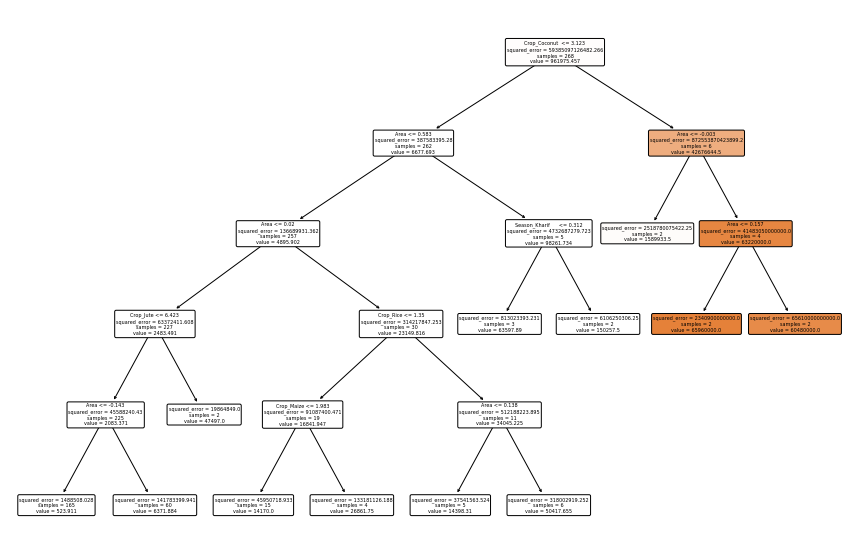

In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('data_1.csv')

# Assuming 'Production' is your target variable and the rest are features
X = data.drop('Production', axis=1)
y = data['Production']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Handle missing values in the target variable
y = y.fillna(y.mean())

# Scale numerical features
scaler = StandardScaler()
X[X.select_dtypes(include=['float64']).columns] = scaler.fit_transform(X.select_dtypes(include=['float64']))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of values for max_depth and other hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree regressor
model = DecisionTreeRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameter values
best_params = grid_search.best_params_

# Create a decision tree regressor with the best hyperparameters
best_model = DecisionTreeRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = best_model.predict(X_test)

# Evaluate the model (for regression, use appropriate metrics such as mean squared error)
mse = mean_squared_error(y_test, predictions)
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error: {mse}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

## Naive Bayes Classification

### Data Loading

In [40]:
import pandas as pd
data = pd.read_csv('data_1.csv')
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0


In [41]:
df = pd.DataFrame(data)
print(df)

                      State_Name District_Name  Crop_Year       Season  \
0    Andaman and Nicobar Islands      NICOBARS     2000.0  Kharif        
1    Andaman and Nicobar Islands      NICOBARS     2000.0  Kharif        
2    Andaman and Nicobar Islands      NICOBARS     2000.0  Kharif        
3    Andaman and Nicobar Islands      NICOBARS     2000.0  Whole Year    
4    Andaman and Nicobar Islands      NICOBARS     2000.0  Whole Year    
..                           ...           ...        ...          ...   
331                    Karnataka      BAGALKOT     2003.0  Whole Year    
332                    Karnataka      BAGALKOT     2003.0  Whole Year    
333                    Karnataka      BAGALKOT     2003.0  Whole Year    
334                    Karnataka      BAGALKOT     2003.0  Whole Year    
335                    Karnataka      BAGALKOT     2003.0  Whole Year    

                    Crop    Area  Production  
0               Arecanut  1254.0      2000.0  
1    Other Kharif

### Data Exploration

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     336 non-null    object 
 1   District_Name  336 non-null    object 
 2   Crop_Year      327 non-null    float64
 3   Season         336 non-null    object 
 4   Crop           336 non-null    object 
 5   Area           323 non-null    float64
 6   Production     335 non-null    float64
dtypes: float64(3), object(4)
memory usage: 18.5+ KB


### Using Seaborn to display counts of each season

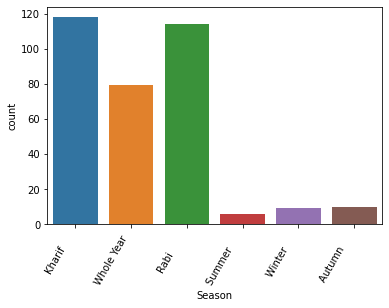

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Season' is the column you want to visualize
sns.countplot(data=data, x='Season')
plt.xticks(rotation=60, ha='right')
plt.show()

### Using Seaborn to plot crop counts by season, adjusting figure size for clarity

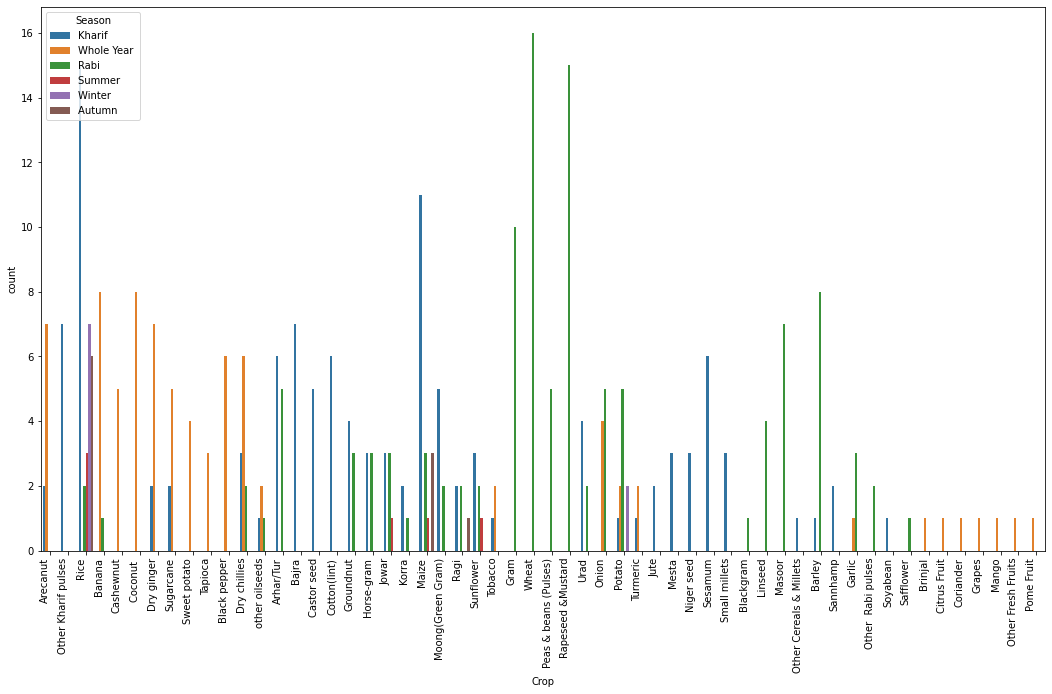

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 10))

# Assuming 'Crop' is the column you want to visualize
# and 'Season' is used for hue
sns.countplot(data=data, x='Crop', hue='Season')
plt.xticks(rotation=90, ha='right')
plt.show()

### Splits data into training and testing sets for modeling

In [45]:
from sklearn.model_selection import train_test_split

X = data.drop('Crop', axis=1)
y = data['Crop']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

### Model Building and Training and Model Evaluation

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data=pd.read_csv("yield_prediction.csv")

# Assuming 'target_column' is the name of the column you want to predict
target_column = 'Crop'
X = data.drop(target_column, axis=1)
y = data[target_column]

# Label encode the target column
le = LabelEncoder()
y = le.fit_transform(y)

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
X = pd.get_dummies(X)  # One-hot encode categorical variables before imputing
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model performance on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='micro')
print("F1 score:", f1)

Accuracy: 0.04847721408399196
F1 score: 0.04847721408399196


Number of unique classes: 122


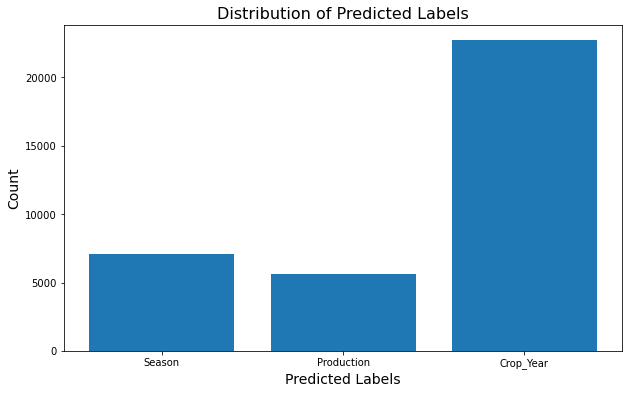

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are your true and predicted labels
class_labels = ["Season", "Production", "Crop_Year"]  # Update with your actual class labels
cm = confusion_matrix(y_test, y_pred)

# Check the number of unique classes
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
print("Number of unique classes:", len(unique_classes))

# Update the display labels based on the actual class labels
labels = [f"{class_labels[i % len(class_labels)]}" for i in range(len(unique_classes))]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, np.sum(cm, axis=0))
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Predicted Labels', fontsize=16)

plt.show()

In [48]:
from collections import defaultdict
import pandas as pd

data=pd.read_csv("yield_prediction.csv")


features = data[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production']].values.tolist()

labels = data['Area'].values.tolist()

# Function to calculate probabilities
def calculate_probabilities(features, labels):
    class_counts = defaultdict(int)
    feature_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

    # Count occurrences of each class and feature-value pairs
    for i in range(len(features)):
        label = labels[i]
        class_counts[label] += 1
        for j in range(len(features[i])):
            feature_counts[label][j][features[i][j]] += 1

    # Calculate probabilities
    total_samples = len(labels)
    class_probabilities = {label: count / total_samples for label, count in class_counts.items()}
    feature_probabilities = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

    for label in class_counts:
        for j in range(len(features[0])):
            for value in feature_counts[label][j]:
                feature_probabilities[label][j][value] = feature_counts[label][j][value] / class_counts[label]

    return class_probabilities, feature_probabilities

# Predict function
def predict(class_probabilities, feature_probabilities, new_instance):
    probabilities = defaultdict(float)

    for label in class_probabilities:
        for j, value in enumerate(new_instance):
            probabilities[label] *= feature_probabilities[label][j][value]

    # Determine the class with the highest probability
    predicted_class = max(probabilities, key=probabilities.get)
    return predicted_class

# Calculate probabilities
class_probabilities, feature_probabilities = calculate_probabilities(features, labels)

new_instance = ['Andaman and Nicobar Islands', 'NICOBARS', '2000.0', 'Kharif', 'Rice', '102.0', '321.0']
predicted_class = predict(class_probabilities, feature_probabilities, new_instance)
print("Predicted class:", predicted_class)

Predicted class: 1254.0


In [49]:
from collections import defaultdict
import pandas as pd

data=pd.read_csv("yield_prediction.csv")

features = data[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production']].values.tolist()

labels = data['Crop'].values.tolist()

# Function to calculate probabilities
def calculate_probabilities(features, labels):
    class_counts = defaultdict(int)
    feature_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

    # Count occurrences of each class and feature-value pairs
    for i in range(len(features)):
        label = labels[i]
        class_counts[label] += 1
        for j in range(len(features[i])):
            feature_counts[label][j][features[i][j]] += 1

    # Calculate probabilities
    total_samples = len(labels)
    class_probabilities = {label: count / total_samples for label, count in class_counts.items()}
    feature_probabilities = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

    for label in class_counts:
        for j in range(len(features[0])):
            for value in feature_counts[label][j]:
                feature_probabilities[label][j][value] = feature_counts[label][j][value] / class_counts[label]

    return class_probabilities, feature_probabilities

# Predict function
def predict(class_probabilities, feature_probabilities, new_instance):
    probabilities = defaultdict(float)

    for label in class_probabilities:
        for j, value in enumerate(new_instance):
            probabilities[label] *= feature_probabilities[label][j][value]

    # Determine the class with the highest probability
    predicted_class = max(probabilities, key=probabilities.get)
    return predicted_class

# Calculate probabilities
class_probabilities, feature_probabilities = calculate_probabilities(features, labels)

new_instance = ['Andaman and Nicobar Islands', 'NICOBARS', '2000.0', 'Kharif', 'Rice', '102.0', '321.0']
predicted_class = predict(class_probabilities, feature_probabilities, new_instance)
print("Predicted class:", predicted_class)

Predicted class: Arecanut


# Clustering Algorithms

### Importing Required Libraries

In [50]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame

### Generating Synthetic Data for Yield Production

In [51]:
yield_production, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=20)

###  Creating a DataFrame and Visualizing the Data

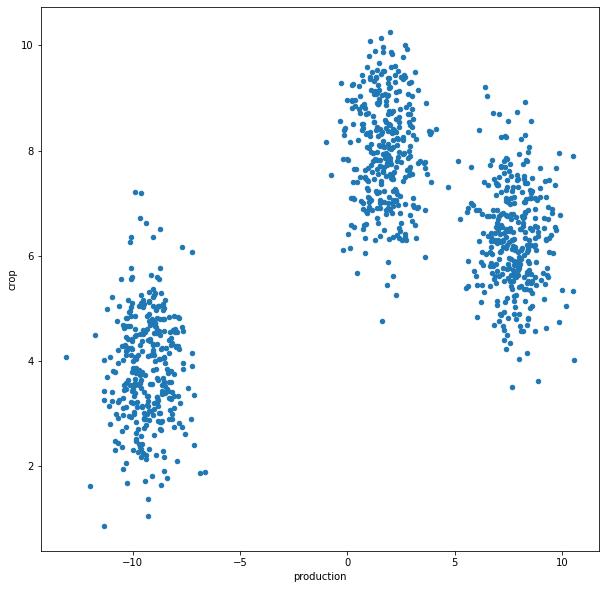

In [52]:
df = DataFrame(dict(x=yield_production[:,0], y=yield_production[:,1]))
fig, ax = plt.subplots(figsize=(10,10))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('production')
plt.ylabel('crop')
plt.show()

### Function to Initialize Centroids for Clustering

In [100]:
def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)

### Function to Calculate Euclidean Distance

In [101]:
def dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

## ASSIGNING CLUSTERS

### Function to Assign Data Points to the Nearest Cluster

In [102]:
def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

### Function to Calculate New Centroids Based on Cluster Membership

In [103]:
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

### Function to Measure Changes in Centroid Positions Between Iterations

In [104]:
def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

## CLUSTERING USING DATAFRAMES

### Function to Visualize Clusters and Centroids

In [105]:
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:, 0], y=X[:, 1], label=cluster))
    colors = {0: 'red', 1: 'yellow', 2: 'pink'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

# K-MEANS

### K-Means Clustering Algorithm Implementation

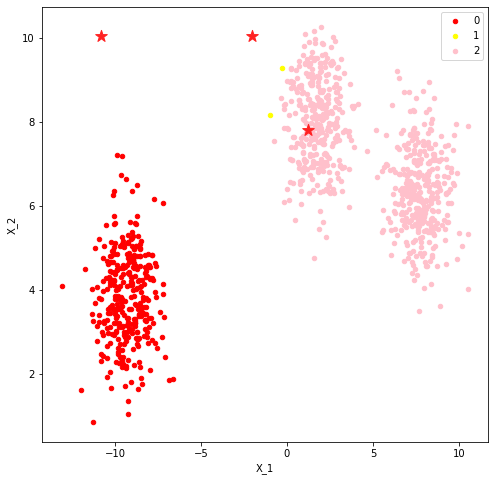

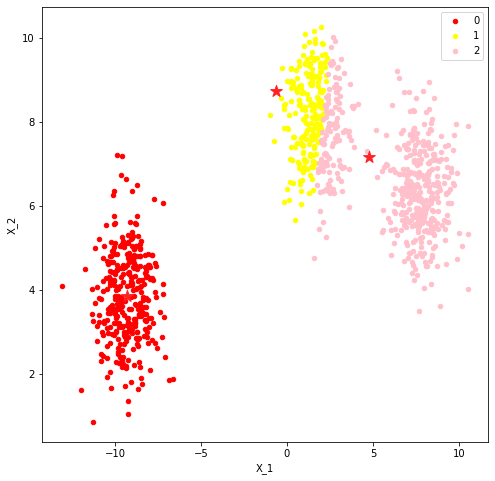

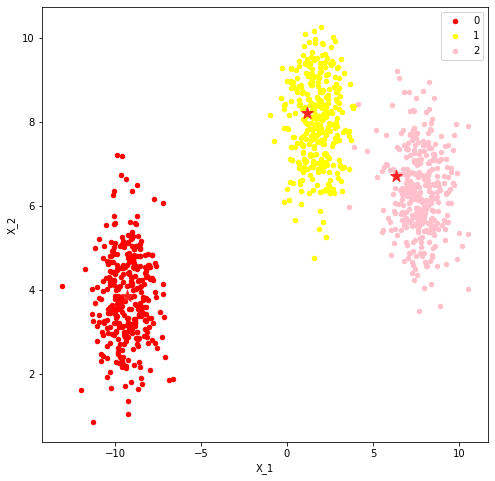

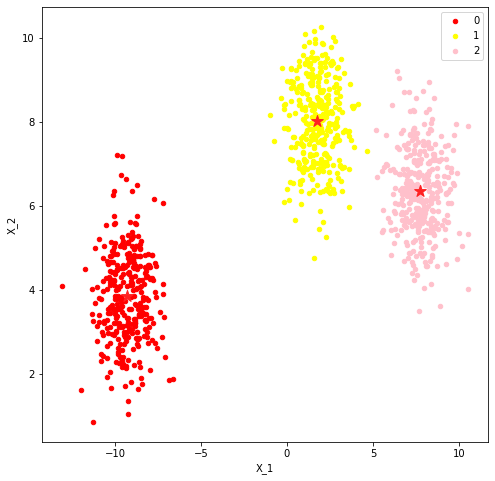

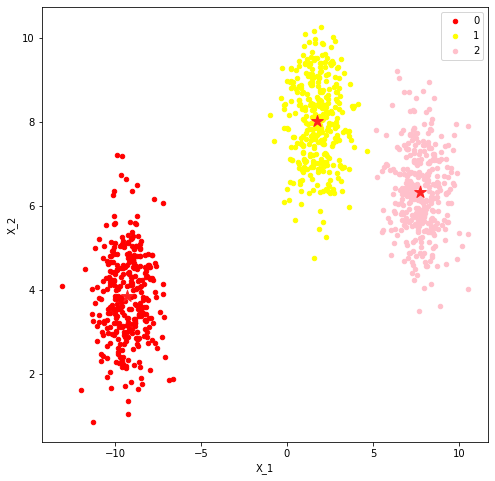

In [106]:
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster

cluster = k_means(3, yield_production)

# k-medoids

### K-Medoids Clustering Algorithm Implementation

In [63]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances


In [64]:
def k_medoids(k, X, max_iter=100):
    # Initialize medoids randomly
    m, n = X.shape
    medoids_idx = np.random.choice(m, k, replace=False)
    medoids = X[medoids_idx]

    for _ in range(max_iter):
        # Assign each data point to the nearest medoid
        distances = pairwise_distances(X, medoids, metric='euclidean')
        labels = np.argmin(distances, axis=1)

        # Update medoids
        for i in range(k):
            medoid_indices = np.where(labels == i)[0]
            cluster_points = X[medoid_indices]
            cluster_distances = pairwise_distances(cluster_points, cluster_points, metric='euclidean')
            total_distances = np.sum(cluster_distances, axis=1)
            new_medoid_index = medoid_indices[np.argmin(total_distances)]
            medoids[i] = X[new_medoid_index]

    return labels, medoids

### Example Usage of K-Medoids Clustering and Medoid Points Printing


#### Generate synthetic data

In [66]:
np.random.seed(0)
X, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=20)


#### Apply K-Medoids clustering

In [67]:
k = 3
labels, medoids = k_medoids(k, X)


#### Print medoid points (cluster centers)

In [68]:
print("Medoid points (cluster centers):")
print(medoids)

Medoid points (cluster centers):
[[ 1.51927726  7.82424385]
 [ 7.59114483  6.77649377]
 [-8.94408194  3.94421441]]


# Visualization

In [69]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [70]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [71]:
data=pd.read_csv("yield_prediction.csv")

In [72]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014.0,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014.0,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014.0,Winter,Rice,279151.0,597899.0


## Using PIE CHART

### Visualizing Top Crops and Others by Production with a Pie Chart

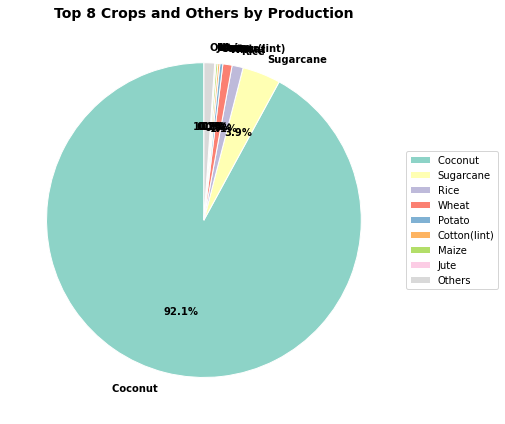

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data from CSV
file_path = 'yield_prediction.csv'
data = pd.read_csv(file_path)

# Aggregate Data by Crop and Sum Production
agg_data = data.groupby('Crop')['Production'].sum().reset_index()

# Select Top N Crops by Production
top_n = 8 
top_crops = agg_data.nlargest(top_n, 'Production')

# Group Smaller Categories into 'Others'
other_crops = agg_data[~agg_data['Crop'].isin(top_crops['Crop'])]
others_row = pd.DataFrame({'Crop': ['Others'], 'Production': [other_crops['Production'].sum()]})
agg_data_grouped = pd.concat([top_crops, others_row])

# Assign Colors Using a Qualitative Color Palette
colors = plt.cm.Set3.colors[:len(agg_data_grouped)]

# Create a Pie Chart
plt.figure(figsize=(8, 6))

wedges, texts, autotexts = plt.pie(
    agg_data_grouped['Production'],
    labels=agg_data_grouped['Crop'],
    autopct='%1.1f%%',  
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}, 
    textprops={'fontsize': 10, 'fontweight': 'bold'}  
)

# Set Title for the Pie Chart
plt.title(f'Top {top_n} Crops and Others by Production', fontsize=14, fontweight='bold')

# Adjust Label and Autopct Text Properties
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(10)
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Create Legend for Crop Categories
plt.legend(agg_data_grouped['Crop'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Ensure Tight Layout and Display the Plot
plt.tight_layout()  
plt.show()


## LINE GRAPH

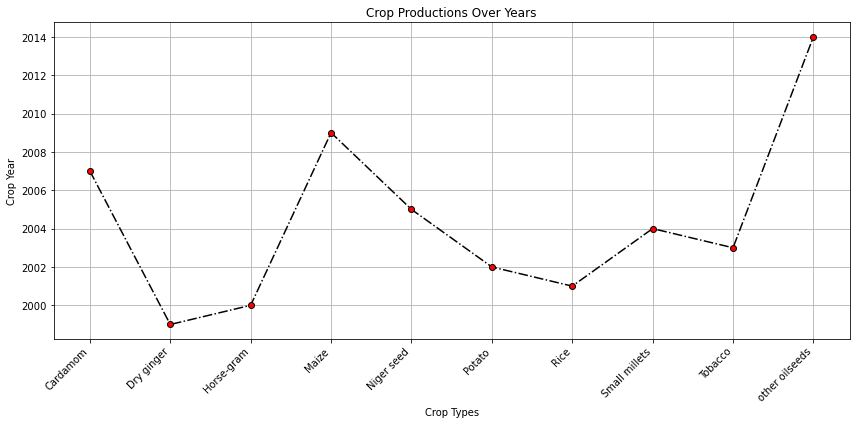

In [81]:
import matplotlib.pyplot as plt

data_sorted = data.sort_values(by='Crop')
selected_data = data_sorted.iloc[::len(data_sorted)//10, :]

x_axis = selected_data['Crop']
y_axis = selected_data['Crop_Year']

plt.figure(figsize=(12, 6))

plt.plot(x_axis, y_axis, color='black', linestyle='-.', marker='o', markerfacecolor='r')

plt.xlabel('Crop Types')
plt.ylabel('Crop Year')
plt.title('Crop Productions Over Years')
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()  

plt.grid(True)
plt.show()

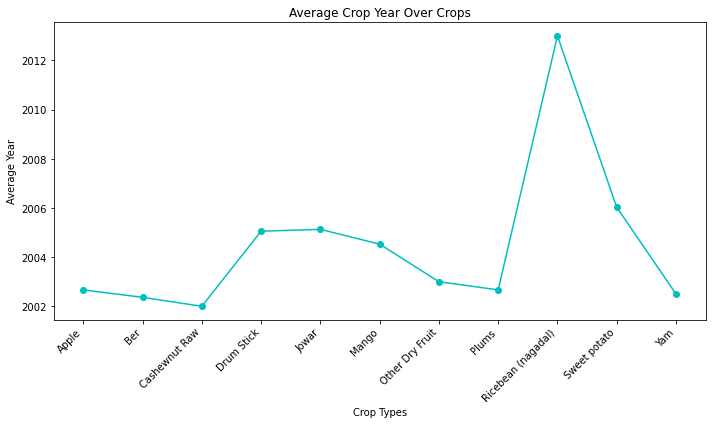

In [83]:
import matplotlib.pyplot as plt

grouped_data = data.groupby('Crop')['Crop_Year'].mean().reset_index()

selected_data = grouped_data.iloc[::len(grouped_data)//10, :]

plt.figure(figsize=(10, 6))  

plt.plot(selected_data['Crop'], selected_data['Crop_Year'], marker='o', linestyle='-', color='c')

plt.xlabel('Crop Types')
plt.ylabel('Average Year')
plt.title('Average Crop Year Over Crops')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


## SCATTER PLOT

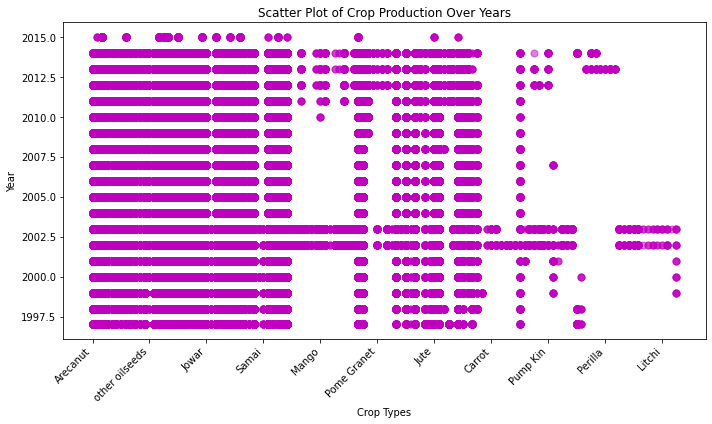

In [86]:
import matplotlib.pyplot as plt

Crop = data['Crop']
Year = data['Crop_Year']

selected_crop_values = Crop.unique()[::len(Crop.unique())//10]

plt.figure(figsize=(10, 6))

plt.scatter(Crop, Year, color='m', marker='o', alpha=0.5, s=50)  # Adjust marker size (s) and transparency (alpha)
plt.xlabel('Crop Types')
plt.ylabel('Year')
plt.title('Scatter Plot of Crop Production Over Years')

plt.xticks(selected_crop_values, rotation=45, ha='right', fontsize=10)  # Adjust x-axis tick rotation and font size

plt.tight_layout()
plt.show()


## BAR GRAPH

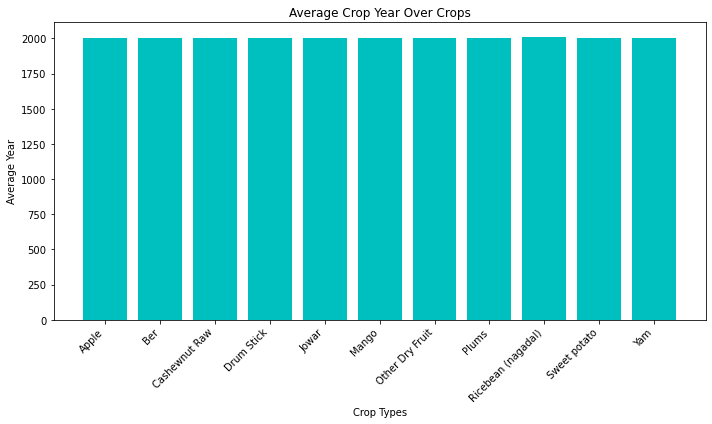

In [88]:
import matplotlib.pyplot as plt

grouped_data = data.groupby('Crop')['Crop_Year'].mean().reset_index()

selected_data = grouped_data.iloc[::len(grouped_data)//10, :]

plt.figure(figsize=(10, 6))

plt.bar(selected_data['Crop'], selected_data['Crop_Year'], color='c')

plt.xlabel('Crop Types')
plt.ylabel('Average Year')
plt.title('Average Crop Year Over Crops')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## QUERIES

## 1. List the distinct crops present in the dataset?

In [89]:
data.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

## 2. What is the total production of Rice in the years before 2005?

In [90]:
data[(data.Crop == "Rice") & (data.Crop_Year< 2005)]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001.0,Kharif,Rice,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002.0,Kharif,Rice,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003.0,Kharif,Rice,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004.0,Kharif,Rice,52.94,72.57
...,...,...,...,...,...,...,...
245685,West Bengal,PURULIA,2003.0,Summer,Rice,1800.00,4104.00
245694,West Bengal,PURULIA,2003.0,Winter,Rice,290796.00,632908.00
245695,West Bengal,PURULIA,2004.0,Autumn,Rice,780.00,1604.00
245718,West Bengal,PURULIA,2004.0,Summer,Rice,1354.00,2836.00


## 3. What are the maximum productions for each Crop?


In [91]:
data.groupby('Crop')['Production'].max()
data.groupby('Crop').max()

,State_Name,District_Name,Crop_Year,Season,Area,Production
Crop,,,,,,
Apple,Tamil Nadu,THE NILGIRIS,2003.0,Whole Year,4.0,0.0
Arcanut (Processed),Karnataka,UTTAR KANNAD,2002.0,Whole Year,27070.0,48292.0
Arecanut,West Bengal,WEST KHASI HILLS,2014.0,Whole Year,51689.0,538587.0
Arhar/Tur,West Bengal,ZUNHEBOTO,2014.0,Winter,429589.0,394592.0
Ash Gourd,Tamil Nadu,VIRUDHUNAGAR,2003.0,Whole Year,489.0,0.0
...,...,...,...,...,...,...
Wheat,West Bengal,ZUNHEBOTO,2015.0,Winter,413000.0,1969000.0
Yam,Tamil Nadu,VIRUDHUNAGAR,2003.0,Whole Year,375.0,0.0
other fibres,Telangana,JHALAWAR,2003.0,Whole Year,6268.0,0.0


## 4. What is the frequency distribution of different crops

In [92]:
data.Crop.value_counts()

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

## 5. Sort the rows based on earliest Crop Year

In [93]:
data.sort_values('Crop_Year')

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
57550,Gujarat,AMRELI,1997.0,Whole Year,Onion,1700.0,59900.0
217094,Uttar Pradesh,KANPUR NAGAR,1997.0,Summer,Maize,12.0,19.0
217095,Uttar Pradesh,KANPUR NAGAR,1997.0,Summer,Moong(Green Gram),1236.0,739.0
217096,Uttar Pradesh,KANPUR NAGAR,1997.0,Summer,Urad,405.0,190.0
217097,Uttar Pradesh,KANPUR NAGAR,1997.0,Whole Year,Potato,11325.0,143646.0
...,...,...,...,...,...,...,...
199759,Uttar Pradesh,AMBEDKAR NAGAR,NaN,Whole Year,Onion,146.0,2093.0
199814,Uttar Pradesh,AMBEDKAR NAGAR,NaN,Kharif,Rice,113857.0,243408.0
199825,Uttar Pradesh,AMBEDKAR NAGAR,NaN,Rabi,Peas & beans (Pulses),5316.0,3413.0
199884,Uttar Pradesh,AMBEDKAR NAGAR,NaN,Kharif,Sugarcane,9165.0,501216.0


## 6. What are the Crops grown in Andhra Pradesh?

In [94]:
data[data.State_Name.str.contains('Andhra Pradesh')]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
203,Andhra Pradesh,ANANTAPUR,1997.0,Kharif,Arhar/Tur,21400.0,2600.0
204,Andhra Pradesh,ANANTAPUR,1997.0,Kharif,Bajra,1400.0,500.0
205,Andhra Pradesh,ANANTAPUR,1997.0,Kharif,Castor seed,1000.0,100.0
206,Andhra Pradesh,ANANTAPUR,1997.0,Kharif,Cotton(lint),7300.0,9400.0
207,Andhra Pradesh,ANANTAPUR,1997.0,Kharif,Dry chillies,3700.0,7100.0
...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014.0,Rabi,Tobacco,28046.0,89107.0
9827,Andhra Pradesh,WEST GODAVARI,2014.0,Rabi,Tomato,224.0,3035.0
9828,Andhra Pradesh,WEST GODAVARI,2014.0,Rabi,Urad,5418.0,4833.0
9829,Andhra Pradesh,WEST GODAVARI,2014.0,Whole Year,Coconut,21729.0,718991000.0


## 7. What are the crops grown in West Bengal particularly in the district Purulia?

In [95]:
data[(data.State_Name =='West Bengal') & (data.District_Name=='PURULIA')]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
245451,West Bengal,PURULIA,1997.0,Autumn,Ragi,197.0,67.0
245452,West Bengal,PURULIA,1997.0,Autumn,Rice,4327.0,6350.0
245453,West Bengal,PURULIA,1997.0,Kharif,Horse-gram,1626.0,756.0
245454,West Bengal,PURULIA,1997.0,Kharif,Mesta,387.0,3440.0
245455,West Bengal,PURULIA,1997.0,Kharif,Moong(Green Gram),258.0,106.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014.0,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014.0,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014.0,Winter,Rice,279151.0,597899.0


## 8. List all the States where Rice is grown

In [97]:
data[data.Crop=="Rice"]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001.0,Kharif,Rice,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002.0,Kharif,Rice,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003.0,Kharif,Rice,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004.0,Kharif,Rice,52.94,72.57
...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013.0,Summer,Rice,516.00,1274.00
246052,West Bengal,PURULIA,2013.0,Winter,Rice,302274.00,730136.00
246058,West Bengal,PURULIA,2014.0,Autumn,Rice,264.00,721.00
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.00,801.00


## 9. List the Tomato Crops with production less than 500

In [98]:
data[(data.Crop=="Tomato") & (data.Production<500)]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
6904,Andhra Pradesh,SPSR NELLORE,2012.0,Rabi,Tomato,22.0,214.0
6931,Andhra Pradesh,SPSR NELLORE,2013.0,Kharif,Tomato,9.0,161.0
6954,Andhra Pradesh,SPSR NELLORE,2013.0,Rabi,Tomato,13.0,147.0
6984,Andhra Pradesh,SPSR NELLORE,2014.0,Kharif,Tomato,NaN,374.0
90728,Karnataka,KODAGU,2002.0,Whole Year,Tomato,7.0,64.0
...,...,...,...,...,...,...,...
186148,Tamil Nadu,THE NILGIRIS,2002.0,Whole Year,Tomato,5.0,62.0
186992,Tamil Nadu,THIRUVALLUR,2002.0,Whole Year,Tomato,9.0,111.0
187039,Tamil Nadu,THIRUVALLUR,2003.0,Whole Year,Tomato,8.0,81.0
187350,Tamil Nadu,THIRUVARUR,2002.0,Whole Year,Tomato,1.0,12.0


## 10. What are the crops having top productions

In [99]:
data.sort_values('Production',ascending=False)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
178273,Tamil Nadu,COIMBATORE,2011.0,Whole Year,Coconut,82704.0,1.250800e+09
178331,Tamil Nadu,COIMBATORE,2013.0,Whole Year,Coconut,84531.0,1.212000e+09
100654,Kerala,MALAPPURAM,2012.0,Whole Year,Coconut,102417.0,1.125000e+09
100612,Kerala,MALAPPURAM,2009.0,Whole Year,Coconut,108380.0,1.063000e+09
100149,Kerala,KOZHIKODE,1999.0,Whole Year,Coconut,NaN,1.059000e+09
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010.0,Rabi,Peas & beans (Pulses),2.0,NaN
244581,West Bengal,MURSHIDABAD,2006.0,Kharif,Moong(Green Gram),200.0,NaN
245606,West Bengal,PURULIA,2001.0,Rabi,Rapeseed &Mustard,427.0,NaN
245644,West Bengal,PURULIA,2002.0,Rabi,Rapeseed &Mustard,522.0,NaN
